In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pywt
import json

from Change_vector import  Vector_change

ImportError: DLL load failed while importing _path: Impossibile trovare il modulo specificato.

In [31]:
#Ground thruth label 

Agosto23_ground_thruth = np.array(Image.open("ground_thruth\immage_Agosto23_boxe.png"))[: , : , 0 ]
Gennaio23_groind_thruth = np.array(Image.open("ground_thruth\immage_Gennaio23_boxe.png"))[: , : , 0 ]

In [32]:
img_ago = np.array(Image.open("ndsi_agosto23_filter\\reconstructed_img_ndsi_agosto_2023.png"))[: , : , 0 ]
img_feb = np.array(Image.open("ndsi_gennaio_2023_filter\\reconstructed_img_ndsi_gennaio_2023.png"))[: , : , 0 ]


img_ago_gaussina = np.array(Image.open("ndsi_agosto23_filter\\gaussian_ndsi_agosto_2023.png"))[: , : , 0 ]
img_feb_gaussina = np.array(Image.open("ndsi_gennaio_2023_filter\\gaussian_ndsi_gennaio_2023.png"))[: , : , 0 ]


img_ago_median = np.array(Image.open("ndsi_agosto23_filter\\median_ndsi_agosto_2023.png"))[: , : , 0 ]
img_feb_median = np.array(Image.open("ndsi_gennaio_2023_filter\\median_ndsi_gennaio_2023.png"))[: , : , 0 ]




In [33]:

Agosto23_ground_thruth = Agosto23_ground_thruth.reshape(1, 1182, 2500)
Gennaio23_groind_thruth =  Gennaio23_groind_thruth.reshape(1, 1182, 2500)

img_ago_dictionary = img_ago.reshape(1, 1182, 2500)
img_feb_dictionary = img_feb.reshape(1, 1182, 2500)

img_ago_gaussina = img_ago_gaussina.reshape(1, 1182, 2500)
img_feb_gaussina = img_feb_gaussina.reshape(1, 1182, 2500)

img_ago_median = img_ago_median.reshape(1, 1182, 2500)
img_feb_median = img_feb_median.reshape(1, 1182, 2500)



In [34]:

vc_ground_thruth = Vector_change( Agosto23_ground_thruth ,  Gennaio23_groind_thruth )
ground_thruth = vc_ground_thruth.perform_Vector_change(0)



VC__Dictionary = Vector_change( img_ago_dictionary ,  img_feb_dictionary , True)

VC_gaussain = Vector_change( img_ago_gaussina ,  img_feb_gaussina , True)

VC_medina = Vector_change( img_ago_median ,  img_feb_median , True)




output_image_Dictionary= VC__Dictionary.perform_Vector_change(226)

output_image_gaussina = VC_gaussain.perform_Vector_change(225)

output_median = VC_medina.perform_Vector_change(230)



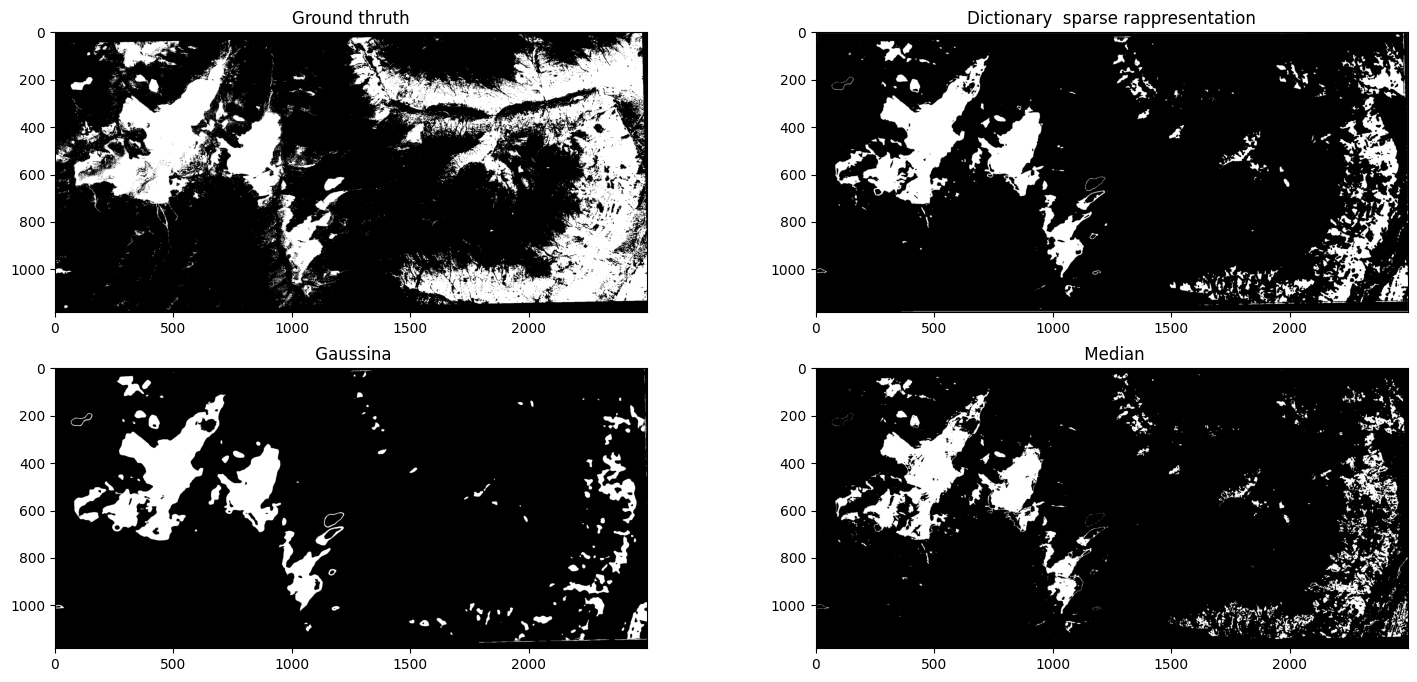

In [35]:
plt.figure(figsize=(18,8))

plt.subplot(221)
plt.imshow(ground_thruth, cmap="gray")
plt.title("Ground thruth")


plt.subplot(222)
plt.imshow(output_image_Dictionary, cmap="gray")
plt.title("Dictionary  sparse rappresentation")

plt.subplot(223)
plt.imshow(output_image_gaussina, cmap="gray")
plt.title(" Gaussina")

plt.subplot(224)
plt.imshow(output_median, cmap="gray")
plt.title(" Median")




plt.show()


In [36]:
def calculate_array_similarity(image_array1, image_array2):
    # Ensure both arrays have the same shape
    if image_array1.shape != image_array2.shape:
        raise ValueError("Image arrays must have the same shape")

    # Compare pixel values and count matches
    match_count = np.sum(image_array1 == image_array2)

    # Calculate similarity percentage
    total_pixels = np.prod(image_array1.shape)
    similarity_percentage = (match_count / total_pixels) * 100

    return similarity_percentage

In [37]:

dictionary_precentage = calculate_array_similarity(ground_thruth, output_image_Dictionary)

gaussina_persentage = calculate_array_similarity(ground_thruth, output_image_gaussina)

medina_percentage = calculate_array_similarity(ground_thruth, output_median)

print("Custom filter", dictionary_precentage)
print("Gaussina filter" ,gaussina_persentage)
print("Medina filter" ,medina_percentage)



Custom filter 82.76331641285955
Gaussina filter 80.05925549915398
Medina filter 80.97773265651438
